## **2.ANALYSE EXPLORATOIRE - MOVEEK**

In [2]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# palette de couleurs pour les graphiques
sns.set_palette("Paired")

In [3]:
#Lecture du fichier nettoyé 
moveek_cln = pd.read_csv("Moveek_cln.csv", encoding="UTF-8")
moveek_cln.head()

,payment_type,shipping_days_real,shipment_days_scheduled,delivery_status,category_name,customer_id,customer_segment,customer_city,latitude,longitude,...,profit_ratio,price_paid,order_region,order_state,product_price,shipping_date,shipping_mode,diff_days,process_days,profit_per_order
0,DEBIT,3,4,Advance shipping,Sporting Goods,20755,Consumer,Caguas,18.251453,-66.037056,...,0.29,314.640015,Southeast Asia,Java Occidental,327.75,2018-02-03 22:56:00,Standard Class,1,3,91.245602
1,TRANSFER,5,4,Late delivery,Sporting Goods,19492,Consumer,Caguas,18.279451,-66.037064,...,-0.80,311.359985,South Asia,Rajastán,327.75,2018-01-18 12:27:00,Standard Class,-1,5,-249.087992
2,CASH,4,4,Shipping on time,Sporting Goods,19491,Consumer,San Jose,37.292233,-121.881279,...,-0.80,309.720001,South Asia,Rajastán,327.75,2018-01-17 12:06:00,Standard Class,0,4,-247.776005
3,DEBIT,3,4,Advance shipping,Sporting Goods,19490,Home Office,Los Angeles,34.125946,-118.291016,...,0.08,304.809998,Oceania,Queensland,327.75,2018-01-16 11:45:00,Standard Class,1,3,24.384799
4,PAYMENT,2,4,Advance shipping,Sporting Goods,19489,Corporate,Caguas,18.253769,-66.037048,...,0.45,298.250000,Oceania,Queensland,327.75,2018-01-15 11:24:00,Standard Class,2,2,134.212496


## Visualisations générales

In [4]:
# Nombre total de commandes du 1er janvier 2015 au 31 janvier 2018
total_order = moveek_cln["order_id"].nunique()
print(f"Moveek a enregistré un total de {total_order} commandes du 1er janvier 2015 au 31 janvier 2018") 

Moveek a enregistré un total de 65752 commandes du 1er janvier 2015 au 31 janvier 2018


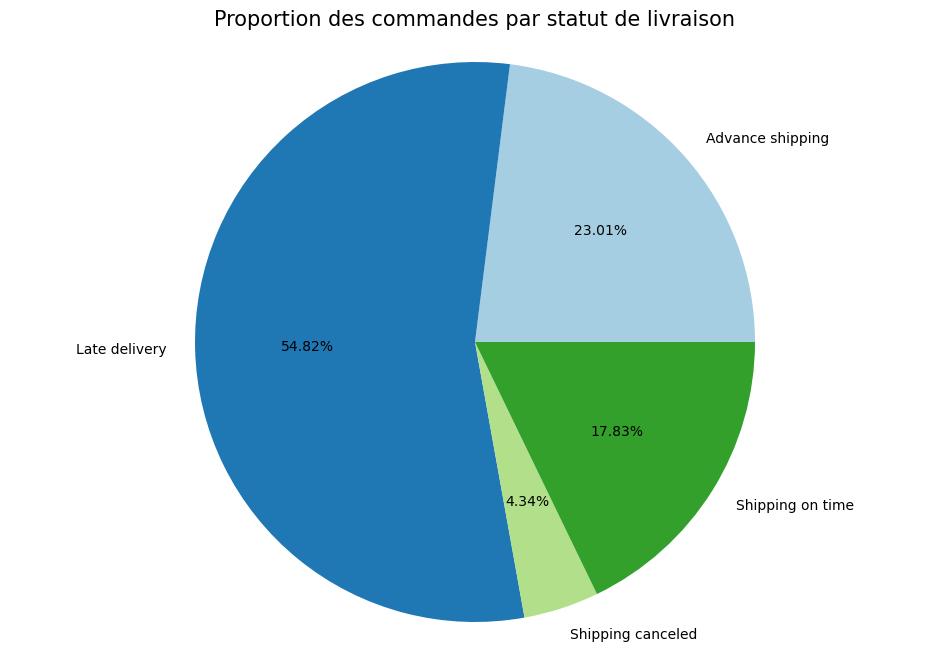

In [5]:
# Visualiser la proportion des commandes par statut de livraison 
delivery_status = moveek_cln.groupby("delivery_status")["order_id"].nunique()

plt.figure(figsize=(12,8))
plt.pie(delivery_status, labels = delivery_status.index, autopct="%.2f%%") #color=
plt.axis("equal")
plt.title("Proportion des commandes par statut de livraison", fontsize=15)

plt.savefig("commandes par statut de livraison.png", dpi=300, bbox_inches="tight")

plt.show()

Plus de 50% des commandes sont livrées en retard, on constate que l'entreprise un réel problème de retard dans les livraisons

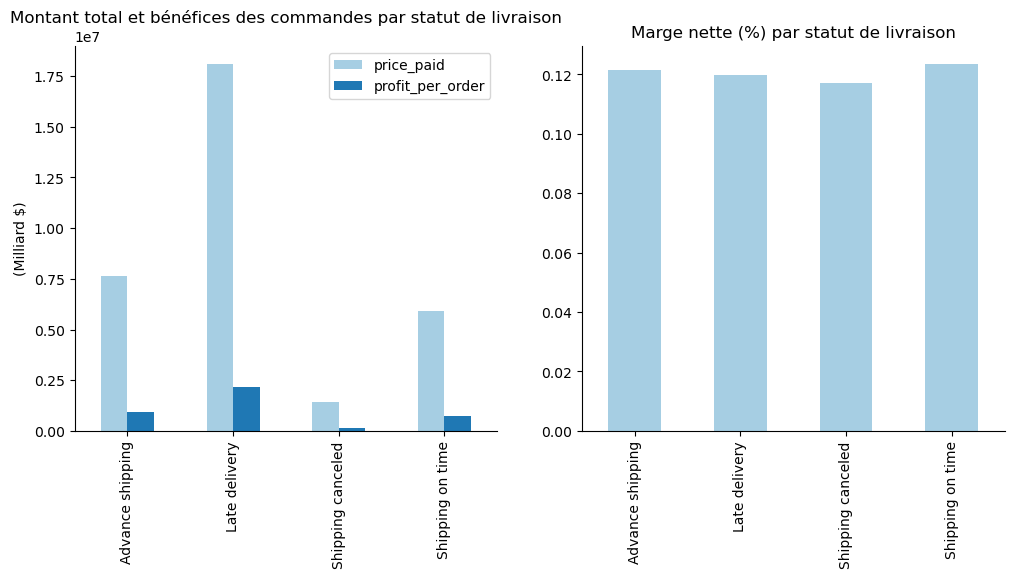

In [6]:
#Visualiser les ventes et les bénéfices par statut de livraison 

fig, ax = plt.subplots(1,2, figsize=(12,5))
#Total ventes et des  bénéfices par statut de livraison 
fig1 =moveek_cln.groupby("delivery_status")[["price_paid","profit_per_order"]].sum()
fig1.plot(kind="bar",ax=ax[0])
ax[0].set_title("Montant total et bénéfices des commandes par statut de livraison")
ax[0].set_ylabel("(Milliard $)")
ax[0].set_xlabel("")

#Ratio des bénéfices réalisés par statut de livraison 
fig2= moveek_cln.groupby("delivery_status")["profit_ratio"].mean()
fig2.plot(kind="bar", ax= ax[1])
ax[1].set_title("Marge nette (%) par statut de livraison")
ax[1].set_ylabel("")
ax[1].set_xlabel("")

sns.despine()

plt.savefig("Ventes et bénéfices par statut de livraison.png", dpi=300, bbox_inches="tight")

plt.show()

Le premier graphique montre que les commandes retardées générent le plus de chiffre d'affaires et marge nette car plus nombreuses. Le second graphique montre que la rentabilité est relativement stable (12% de bénéfices en moyenne) peu importe le statut de livraison.
Donc les commandes retardées restent rentables pour l'entreprise.

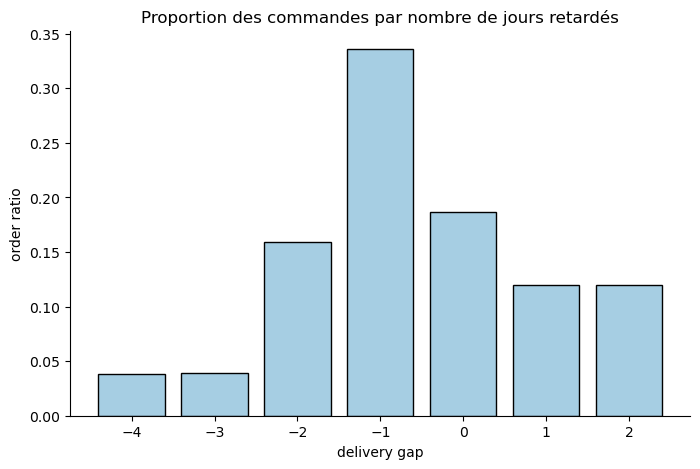

In [7]:
#Visualiser la proportion des commandes selon les écarts de livraison
day_diff = moveek_cln["diff_days"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.bar(day_diff.index, day_diff.values, edgecolor="k")
plt.title("Proportion des commandes par nombre de jours retardés")
plt.xlabel("delivery gap")
plt.ylabel("order ratio")
sns.despine()


plt.savefig("Nombre de jours retardés.png", dpi=300, bbox_inches="tight")

plt.show()

Les commandes sont livrées entre 2 jours en avance et 4 jours de retard. Près de 35% commandes sont livrées avec un jour de retard

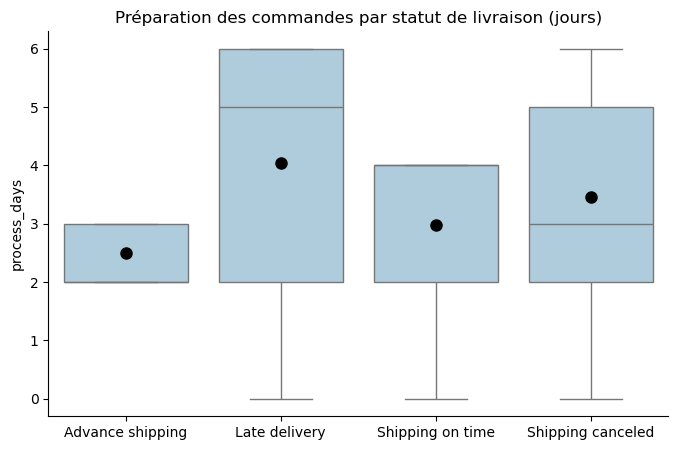

In [8]:
#Visualiser les délais de préparation des commandes par statut de livraison 

plt.figure(figsize=(8,5))
sns.boxplot(moveek_cln, x="delivery_status", y="process_days", showmeans=True, meanprops={'marker':'o','markerfacecolor':'black','markeredgecolor':'black','markersize':'8'})
plt.title("Préparation des commandes par statut de livraison (jours)")
plt.xlabel("")
sns.despine()

plt.savefig("Nombre de jours préparation des commandes.png", dpi=300, bbox_inches="tight")
plt.show()

In [9]:
#le nombre de jours moyen de préparation des commandes par statut de livraison 

preparation_days = (
    moveek_cln
    .groupby("delivery_status", as_index=False)["process_days"]
    .mean()
    .sort_values("process_days", ascending=False)
)

preparation_days

,delivery_status,process_days
1,Late delivery,4.044253
2,Shipping canceled,3.450477
3,Shipping on time,2.975214
0,Advance shipping,2.498149


Les commandes retardées ont un délais de traitement plus important, avec une moyenne de 4 jours de préparation.  
Peut-être un problème d'organisation, d'effectifs à voir. Les retards de livraison peuvent être liés au temps de préparation de la commande ou la réception des commandes.

In [10]:
# Nombre de jours de retard par rapport à la date prévue
diff_days = (
    moveek_cln
    .groupby("delivery_status", as_index=False)["diff_days"]
    .mean()
)

diff_days

,delivery_status,diff_days
0,Advance shipping,1.501851
1,Late delivery,-1.618184
2,Shipping canceled,-0.572737
3,Shipping on time,0.000000


Les commmandes retardées ont en moyenne 1,6 jours de retard par rapport à la date prévue

In [12]:
# Total de commandes par mois

moveek_cln["order_date"] = pd.to_datetime(moveek_cln["order_date"])

orders_overtime = (
    moveek_cln
    .set_index("order_date")
    .resample("ME")
    .agg({"order_id":"nunique"})
    
)
orders_overtime.head()

,order_id
order_date,
2015-01-31,1787
2015-02-28,1585
2015-03-31,1781
2015-04-30,1710
2015-05-31,1776


In [13]:
# Total de commandes retardées par mois 
late_order_overtime = (
    moveek_cln[moveek_cln["delivery_status"]=="Late delivery"]
    .set_index("order_date")
    .resample("ME")
    .agg({"order_id":"nunique"})
    
)
late_order_overtime.head()

,order_id
order_date,
2015-01-31,963
2015-02-28,871
2015-03-31,978
2015-04-30,927
2015-05-31,969


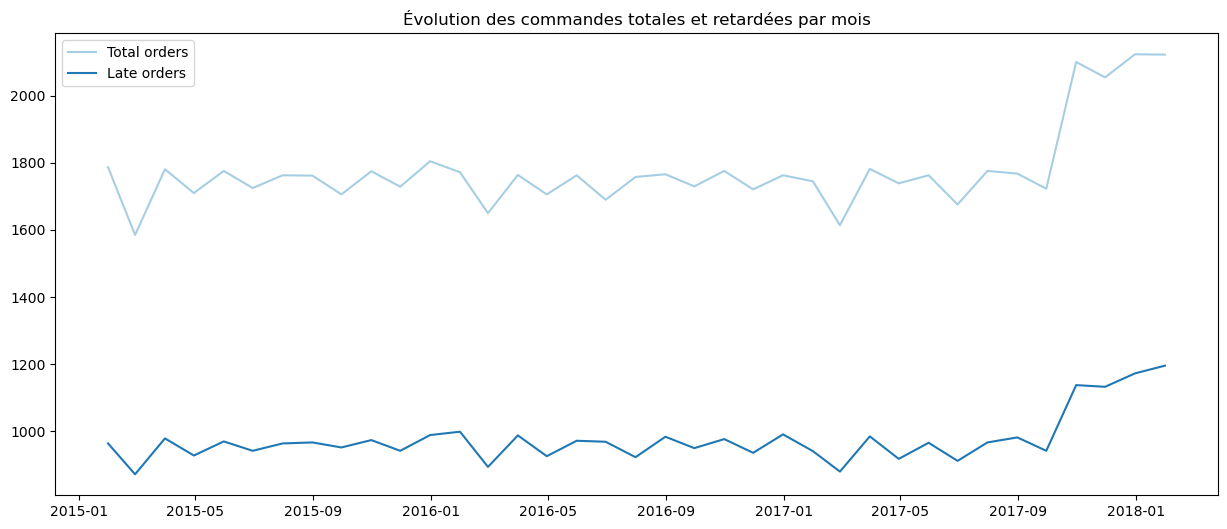

In [14]:
# Évolution du total de commandes et commandes retardées au cours des mois
plt.figure(figsize=(15,6))
plt.plot(orders_overtime, label="Total orders")
plt.plot(late_order_overtime, label="Late orders")
plt.title("Évolution des commandes totales et retardées par mois")
plt.legend()

plt.savefig("Évolution des commandes totales et retardées.png", dpi=300, bbox_inches="tight")

plt.show()

Le volume des commandes est relativement constant au cours des mois avec une légère hause à partir du mois d'octobre. On constaste également que le volume des commandes retardées est proportionnel au volume total de commandes

## 3.Analyse par catégorie

## Analyser le top 5 des catégories produits par statut de livraison

In [15]:
# Filtrer les données sur les quatre types de statut de livraison 
late_delivery = moveek_cln[moveek_cln["delivery_status"]=="Late delivery"]
ship_on_time = moveek_cln[moveek_cln["delivery_status"]=="Shipping on time"]
advance_ship = moveek_cln[moveek_cln["delivery_status"]=="Advance shipping"]
ship_canceled = moveek_cln[moveek_cln["delivery_status"]=="Shipping canceled"]

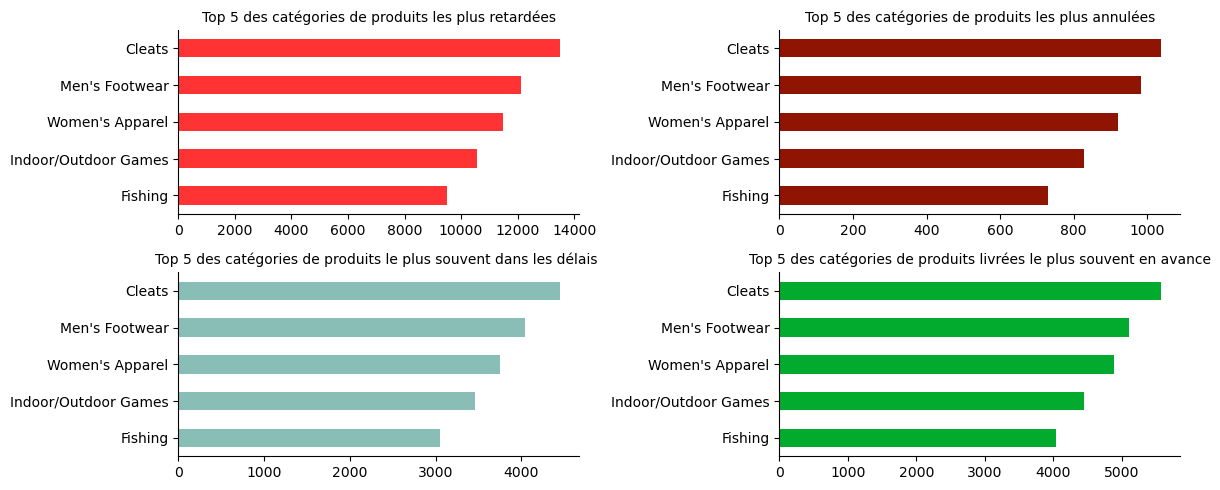

In [16]:
#Visualiser les 5 produits les plus commandés par statut de livraison
fig, ax = plt.subplots(2,2,figsize=(12,5))

#Graphique des 5 produits qui sont le plus retardés
fig1 = late_delivery["category_name"].value_counts().nlargest(n=5).sort_values()
fig1.plot(kind="barh", ax= ax[0][0], color="red",alpha= 0.8)
ax[0][0].set_title("Top 5 des catégories de produits les plus retardées",fontsize=10)
ax[0][0].set_ylabel("")

#Graphique des 10 produits dont l'expédition a été annulée
fig2 = ship_canceled["category_name"].value_counts().nlargest(n=5).sort_values()
fig2.plot(kind="barh", ax= ax[0][1], color=["#8f1402"])
ax[0][1].set_title("Top 5 des catégories de produits les plus annulées",fontsize=10)
ax[0][1].set_ylabel("")


#Graphique des 10 produits qui sont expédiés dans les délais prévus
fig2 = ship_on_time["category_name"].value_counts().nlargest(n=5).sort_values()
fig2.plot(kind="barh", ax= ax[1][0], color=["#137e6d"], alpha=0.5)
ax[1][0].set_title("Top 5 des catégories de produits le plus souvent dans les délais ", fontsize=10)
ax[1][0].set_ylabel("")

#Graphique des 10 produits qui sont expédiés en avance
fig3 = advance_ship["category_name"].value_counts().nlargest(n=5).sort_values()
fig3.plot(kind="barh", ax= ax[1][1], color=["#02ab2e"])
ax[1][1].set_title("Top 5 des catégories de produits livrées le plus souvent en avance",fontsize=10)
ax[1][1].set_ylabel("")
sns.despine()

plt.tight_layout()

plt.savefig("Top 5 des catégories produits.png", dpi=300, bbox_inches="tight")
plt.show()



Le top 5 des catégories les plus livrées est identique pour chaque statut de livraison.\
Les catégories produits concernées sont : Cleats, Men's Footwear, Women's Apparel, Indoor/Outdoor Games, Fishing. Elles représentent les catégories les plus vendues et les plus touchées par les retards de livraison

## Analyser les retards selon le nombre d'articles commandés

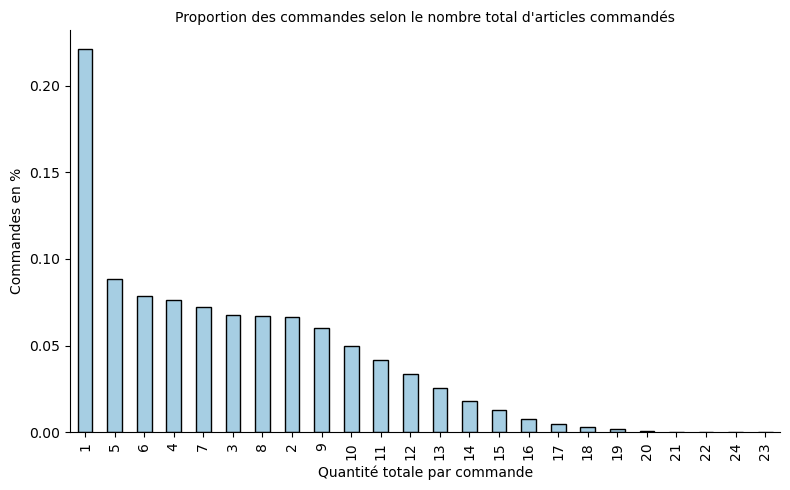

In [17]:
#Visualiser la propotion des commandes par nombre d'articles commandés
plt.figure(figsize=(8,5))
fig= late_delivery.groupby("order_id",as_index=False).agg({"quantity_ordered":"sum"})
fig["quantity_ordered"].value_counts(normalize=True).plot(kind="bar",edgecolor="k")
plt.title("Proportion des commandes selon le nombre total d'articles commandés", fontsize=10)
plt.ylabel("Commandes en %")
plt.xlabel("Quantité totale par commande")

sns.despine()
plt.tight_layout()

plt.savefig("Nombre d'articles commandés.png", dpi=300, bbox_inches="tight")

plt.show()



Le graphique indique que moins il y a d'articles dans une commande est plus elle a de chance d'être retardée. Donc la quantité d'articles commandés n'a pas d'impact sur les retards de livraison

In [18]:
# Moyenne des ventes par article commandé
avg_order_value = (
    late_delivery
    .groupby("order_id",as_index=False)
    .agg({"quantity_ordered":"sum", "price_paid":"sum"})
)

#Visualiser le panier moyen selon le nombre d'articles par commande
avg_order_value.groupby("quantity_ordered").agg({"price_paid":"mean"})

,price_paid
quantity_ordered,
1,229.176731
2,285.534803
3,340.269592
4,400.222078
5,454.253413
6,538.356028
7,616.359467
8,659.614014
9,702.514230


Plus il y a d'articles dans une commande  plus le montant total est élevé

## Analyser les commandes par type client 


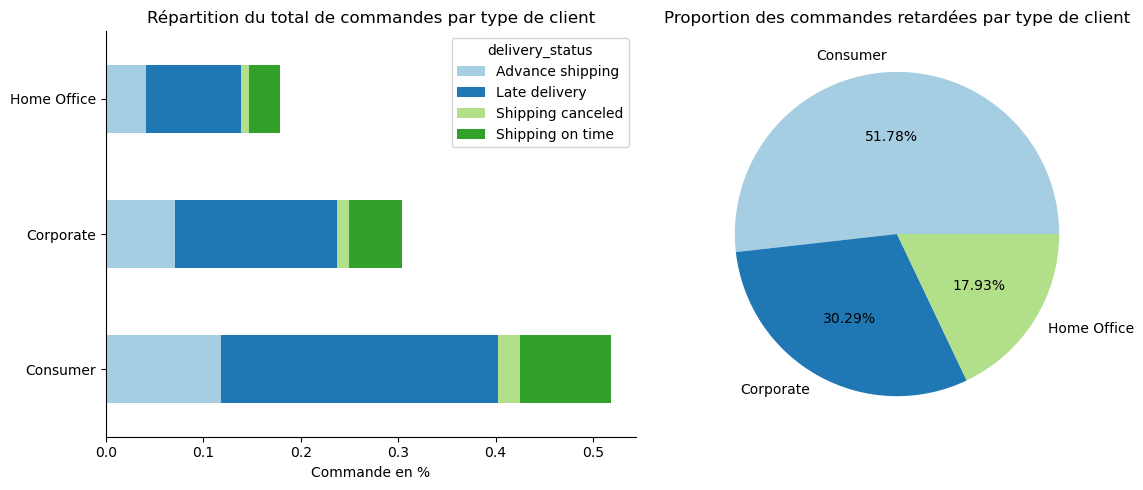

In [19]:
#Visualiser les commandes par catégorie client
fig, ax= plt.subplots(1,2, figsize=(12,5))

#Visualisation des commandes par catégorie client pour l'ensemble des statuts de livraison 
fig1 = moveek_cln.groupby(["customer_segment","delivery_status"]).size().apply(lambda x: x/len(moveek_cln)).unstack()
fig1.plot(kind="barh", stacked=True, ax=ax[0])
ax[0].set_title("Répartition du total de commandes par type de client")
ax[0].set_xlabel("Commande en %")
ax[0].set_ylabel("")

#Visualisation des commandes par catégorie client pour les commandes retardées
fig2= late_delivery["customer_segment"].value_counts()
fig2.plot(kind="pie", autopct="%.2f%%", ax=ax[1])
ax[1].set_title("Proportion des commandes retardées par type de client")
ax[1].set_ylabel("")
ax[1].set_aspect("equal")

sns.despine()
plt.tight_layout()

plt.savefig("Commandes selon type client.png", dpi=300, bbox_inches="tight")
plt.show()

In [20]:
#Jours retardés moyen par type client 
(late_delivery.
 groupby("customer_segment", as_index=False)
 .agg({"diff_days":"mean"})
 .sort_values("diff_days")
)


,customer_segment,diff_days
2,Home Office,-1.625683
1,Corporate,-1.621940
0,Consumer,-1.613390


les consommateurs (particuliers) représentent  notre principale clientèle avec plus de 50% de commandes enregistrées. Les consommateurs sont également les plus touchés par les retards de livraison, plus de 51 % des commandes.
Une moyenne de 1,6 jours de retard pour chaque catégorie client.

## Analyser le status de livraison des commandes par pays


In [21]:
#Filtrer les données sur les 5 pays pour lesquels nous avons le plus de commandes
top5_country = moveek_cln["order_country"].value_counts().head(5)
moveek_top5 = moveek_cln[moveek_cln["order_country"].isin(top5_country.index)]


In [22]:
#Trier les colonnes par ordre décroissant du graphique ci-dessous fig1 
fig1_sort =(
moveek_top5.groupby(["order_country","delivery_status"])
 .agg({"order_id":"nunique"})
 .groupby(level=[0])
 .sum()
 .sort_values("order_id",ascending=False)
)
 

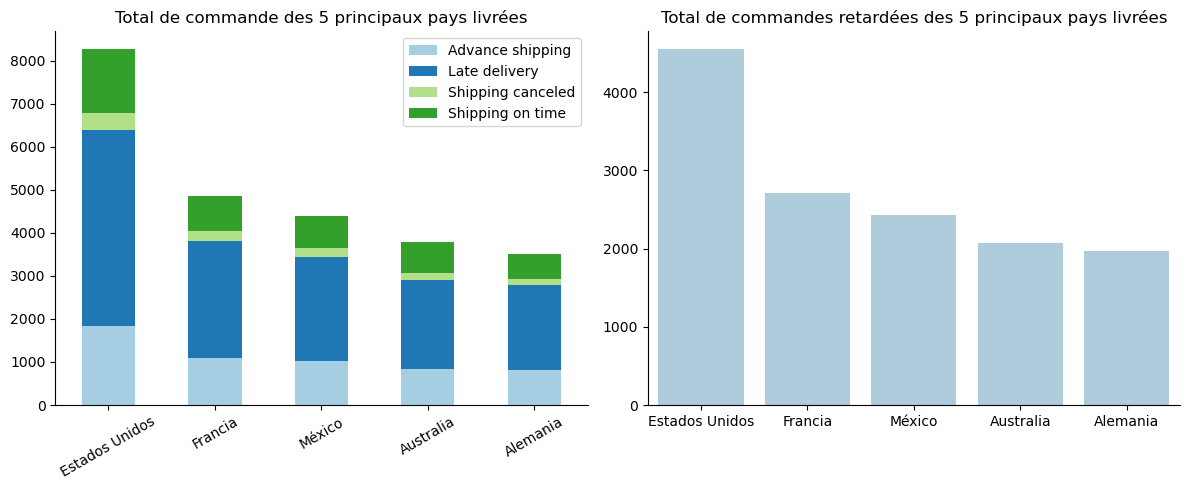

In [23]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

# Visualiser le top 5 des pays pour lesquels nous avons le plus de commandes
fig1 =moveek_top5.groupby(["order_country","delivery_status"]).agg({"order_id":"nunique"}).unstack()
fig1 =fig1.reindex(index=fig1_sort.index, level=0)
fig1.plot(kind="bar",stacked=True, ax=ax[0])
ax[0].set_title("Total de commande des 5 principaux pays livrées")
ax[0].tick_params(axis="x", rotation=30)
ax[0].legend(["Advance shipping","Late delivery","Shipping canceled","Shipping on time"])
ax[0].set_xlabel("")
ax[0].set_ylabel("")

# Visualiser le top 5 des pays qui ont le plus de commandes retardées
fig2 = late_delivery.groupby("order_country", as_index=False).agg({"order_id":"nunique"}).nlargest(5,"order_id")
sns.barplot(fig2, x="order_country", y="order_id", ax=ax[1])
ax[1].set_title("Total de commandes retardées des 5 principaux pays livrées")
ax[1].set_xlabel("")
ax[1].set_ylabel("")

sns.despine()
plt.tight_layout()

plt.savefig("Top 5 des pays de livraison.png", dpi=300, bbox_inches="tight")
plt.show()


Notre clientèle provient principalement des Etats-Unis, France,Mexique, Allemagne et Australie. Plus le volume de commandes expédiées vers ces pays est important plus les retards sont fréquents. Cela suggère une relation possible entre le volume de commandes et la fréquence des retards

In [24]:
# Jours de retard moyen par pays 
(late_delivery[late_delivery["order_country"]
 .isin(top5_country.index)]
 .groupby("order_country", as_index=False)
 .agg({"diff_days":"mean"})
 .sort_values("diff_days")
)

,order_country,diff_days
4,México,-1.663400
3,Francia,-1.656450
2,Estados Unidos,-1.619312
1,Australia,-1.611966
0,Alemania,-1.604310


La distance semble ne pas représentée un facteur déterminant de retard, en moyenne nous avons 1,6 jours de retard pour le top 5 des pays dont les pays sont situés un peu partout dans le monde.

## Analyser les retards par mode de paiement

In [25]:
#Trier l'axe des x par valeur (ordre décroissant) pour le graphique ci-dessous (fig1)
column_sort =(
 moveek_cln.groupby(["payment_type","delivery_status"])
 .agg({"order_id":"nunique"})
 .groupby(level=[0])
 .sum()
 .sort_values("order_id",ascending=False)
)

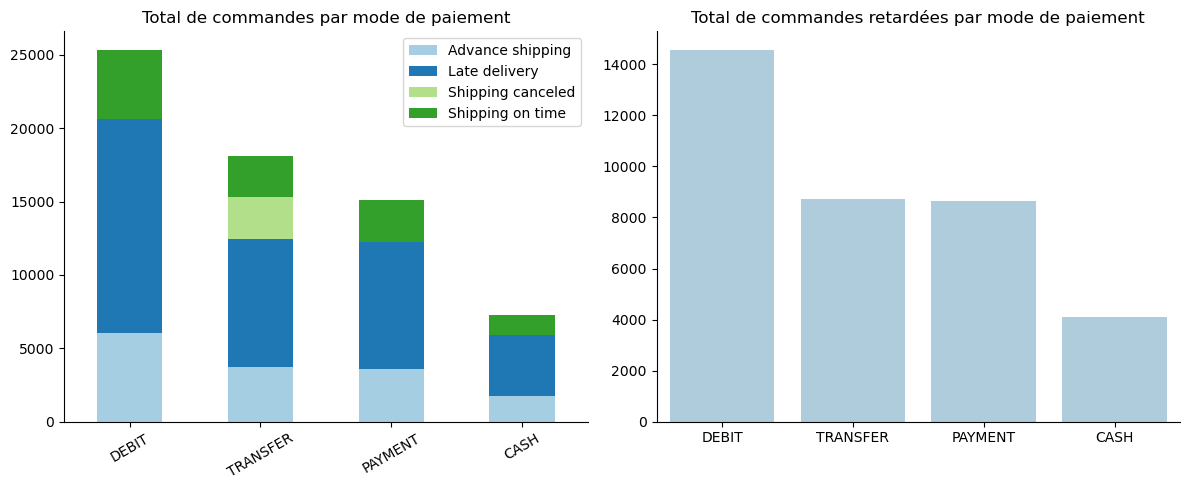

In [26]:
# Visualiser les commandes par mode de paiement

fig, ax = plt.subplots(1,2,figsize=(12,5))
fig1 =moveek_cln.groupby(["payment_type","delivery_status"]).agg({"order_id":"nunique"}).unstack()
fig1 =fig1.reindex(index=column_sort.index, level=0)
fig1.plot(kind="bar",stacked=True, ax=ax[0]) 
ax[0].set_title("Total de commandes par mode de paiement")
ax[0].legend(["Advance shipping","Late delivery","Shipping canceled","Shipping on time"])
ax[0].set_xlabel("")
ax[0].tick_params(axis="x", rotation=30)

fig2 = late_delivery.groupby("payment_type", as_index=False).agg({"order_id":"nunique"})
sort_cols = ["DEBIT","TRANSFER","PAYMENT","CASH"]
sns.barplot(fig2, x="payment_type", y="order_id",ax=ax[1], order=sort_cols)
ax[1].set_title("Total de commandes retardées par mode de paiement")
ax[1].set_xlabel("")
ax[1].set_ylabel("")

sns.despine()
plt.tight_layout()

plt.savefig("Commandes par mode de paiement.png", dpi=300, bbox_inches="tight")

plt.show()


Le virement bancaire (DEBIT) est le principal mode de paiement utilisé pour le reglement des commandes. C'est également le mode de paiement dont les commandes sont le plus souvent retardées.

## Analyser les retards par méthode de livraison

                   

In [27]:
#Visualiser les délais de traitement par méthode d'éxpédition

moveek_cln.groupby("shipping_mode").agg({"shipment_days_scheduled":"mean"}).sort_values("shipment_days_scheduled")

,shipment_days_scheduled
shipping_mode,
Same Day,0.0
First Class,1.0
Second Class,2.0
Standard Class,4.0


Les options d'envoi sont les suivantes : Same day, First class, Second class, Standard Class. On peut supposer qu'elles sont classées du plus cher au moins cher

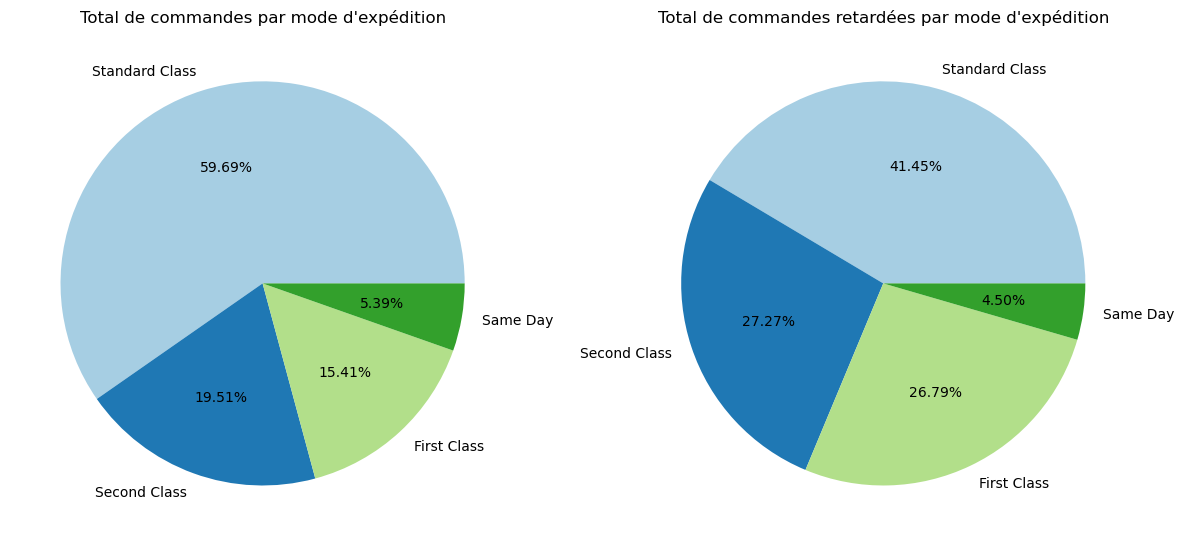

In [28]:
#Visualiser la proportion des commandes par option d'envoi
fig,ax = plt.subplots(1,2,figsize=(12,8))
fig1 = moveek_cln["shipping_mode"].value_counts()
fig1.plot(kind="pie", autopct="%.2f%%", ax=ax[0])
ax[0].set_title("Total de commandes par mode d'expédition")
ax[0].set_ylabel("")
ax[0].set_aspect("equal")

fig2 = late_delivery["shipping_mode"].value_counts()
fig2.plot(kind="pie", autopct="%.2f%%",ax=ax[1])
ax[1].set_title("Total de commandes retardées par mode d'expédition")
ax[1].set_ylabel("") 
ax[1].set_aspect("equal")

plt.tight_layout()

plt.savefig("Commandes par mode d'expédition.png", dpi=300, bbox_inches="tight")

plt.show()

La mode d'expédition "standard class" est majoritaire pour l'envoi des commandes. On remarque également que ce mode d'expédition est le plus affecté par les retards

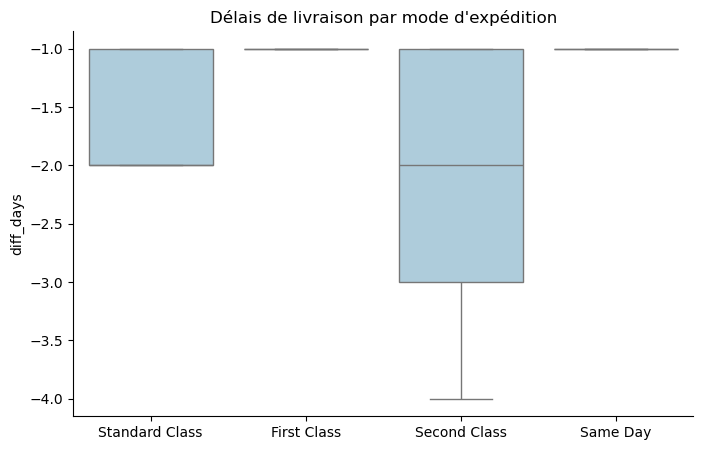

In [29]:
# Moyenne des retards par mode d'expédition 

plt.figure(figsize=(8,5))
sns.boxplot(late_delivery,x="shipping_mode", y="diff_days")
plt.title("Délais de livraison par mode d'expédition")
plt.xlabel("")

sns.despine()
plt.tight_layout

plt.savefig("Préparation par mode d'expédition.png", dpi=300, bbox_inches="tight")
plt.show()

In [30]:
#Jours moyen de retard par option d'envoi
late_delivery.groupby("shipping_mode", as_index=False)["diff_days"].mean().sort_values("diff_days")

,shipping_mode,diff_days
2,Second Class,-2.496795
3,Standard Class,-1.506838
0,First Class,-1.000000
1,Same Day,-1.000000


Le mode d'expedition standard class qui semble être le moins cher de tous les modes, à moins de jours de retard que le mode second class.
Il semblerait que la priorisation des commandes selon le mode d'expédition ne soit pas respectée. Peut-être dû à une surcharge de l'activité.

## Visualiser le volume de commande par jour 

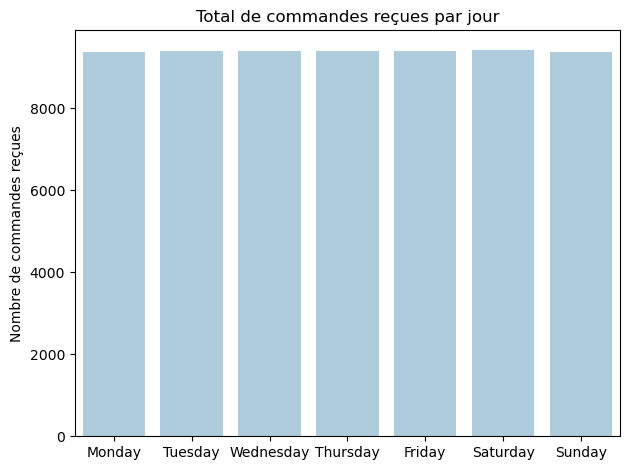

In [31]:
# Création d'une colonne weekdays pour voir le volume de commande par jour
moveek_cln["weekdays"]= moveek_cln["order_date"].dt.day_name()

# Grouper le nombre de commandes reçues par jour
orders_weekdays = moveek_cln.groupby("weekdays", as_index=False).agg({"order_id":"nunique"})
weekdays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# Visualiser le nombre de commandes reçues par jour
sns.barplot(orders_weekdays, x="weekdays", y="order_id", order=weekdays)
plt.title("Total de commandes reçues par jour")
plt.xlabel("")
plt.ylabel("Nombre de commandes reçues")

plt.tight_layout()
plt.savefig("Commandes totale par jour.png", dpi=300, bbox_inches="tight")

plt.show()

Le volume de commande reçu est identique chaque jour de la semaine

In [32]:
moveek_cln.groupby("weekdays", as_index=False).agg(order_count =("order_id","nunique"))

,weekdays,order_count
0,Friday,9400
1,Monday,9368
2,Saturday,9430
3,Sunday,9367
4,Thursday,9395
5,Tuesday,9395
6,Wednesday,9397


## Visualiser le volume de commande par heure

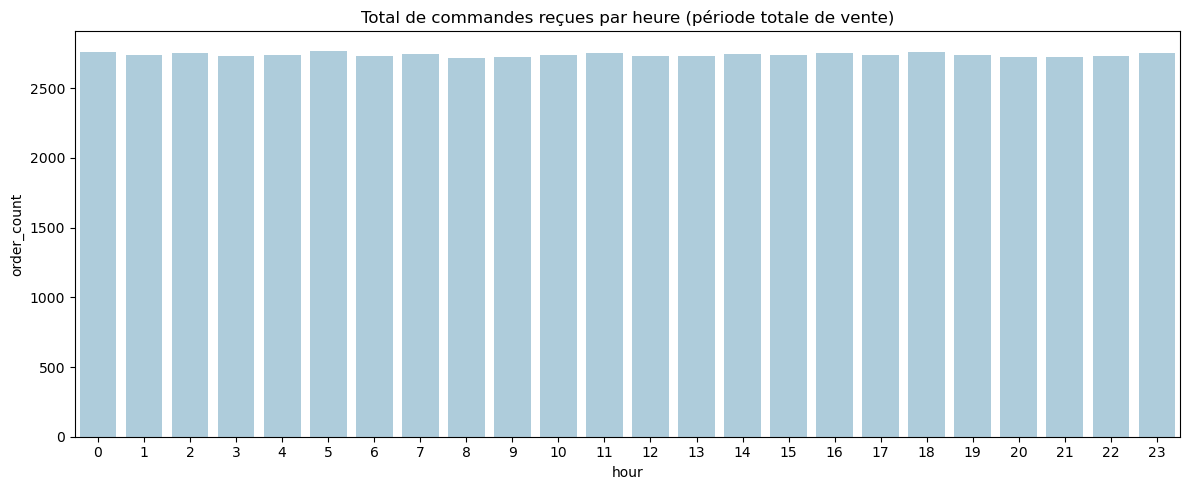

In [33]:
# Création d'une colonne weekdays pour voir le volume de commande par heure
moveek_cln["hour"]= moveek_cln["order_date"].dt.hour
orders_hour = moveek_cln.groupby("hour", as_index=False).agg(order_count = ("order_id","nunique"))

plt.figure(figsize=(12,5))
sns.barplot(data=orders_hour, x="hour", y="order_count")
plt.title("Total de commandes reçues par heure (période totale de vente)")

plt.tight_layout()

plt.savefig("Commandes totales par heure.png", dpi=300, bbox_inches="tight")
plt.show()

Le volume de commande est assez constant par heure avec un peu plus de 2500 commandes reçues


In [34]:
## Visualiser les 10 magasins avec le plus de commandes

late_order_city = late_delivery.groupby("customer_city").agg({"order_id": "nunique"}).sort_values("order_id", ascending=False)


late_order_city.head(10)

,order_id
customer_city,
Caguas,13367
Chicago,792
Los Angeles,690
Brooklyn,674
New York,349
Philadelphia,300
Bronx,300
Houston,260
Miami,257


## **Corrélations**

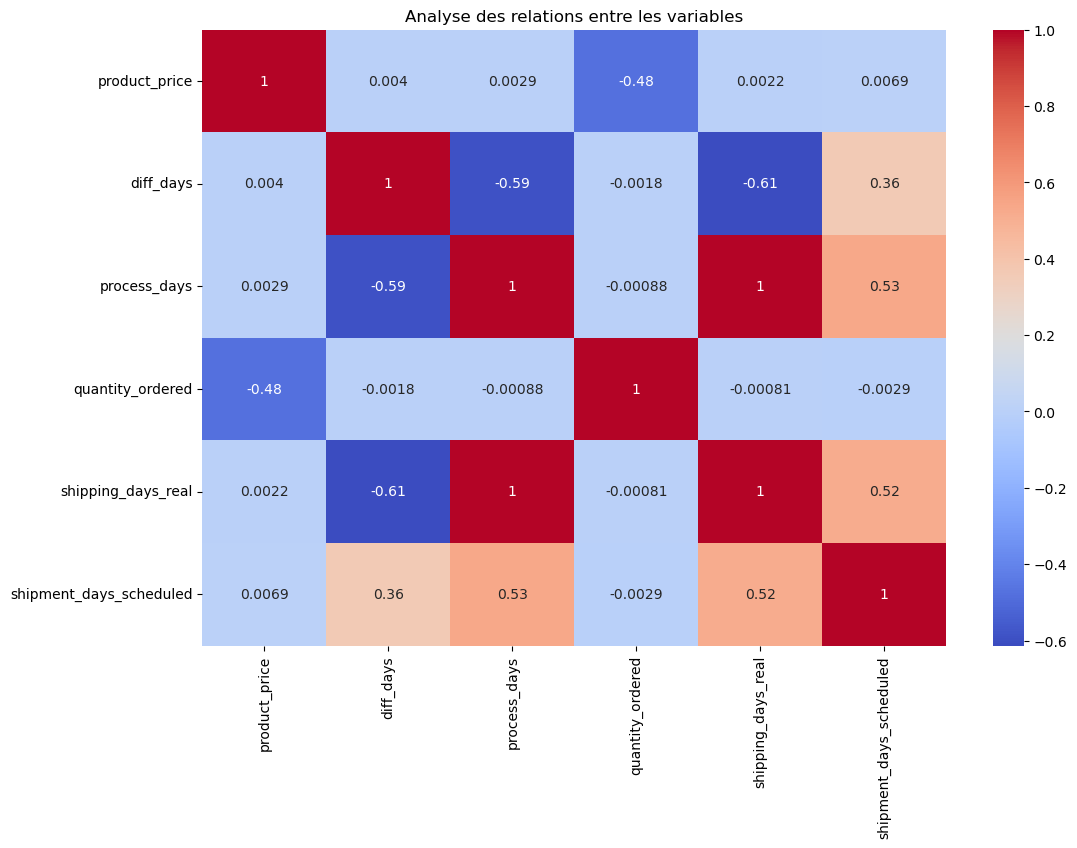

In [36]:
#Visualiser les corrélations entre certaines variables 
moveek_corr = moveek_cln[["product_price","diff_days","process_days","quantity_ordered","shipping_days_real","shipment_days_scheduled"]]

plt.figure(figsize=(12,8))
sns.heatmap(moveek_corr.corr(),annot=True, cmap="coolwarm")
plt.title("Analyse des relations entre les variables")

plt.savefig("Corrélations.png", dpi=300, bbox_inches="tight")
plt.show()

Plusieurs corrélations significatives entre les variables.

Corrélations négatives :\
Shipping_days_real - diff_days (-0.61),\
process_days - diff_days (-0.59)

Corrélation positive : \
process_days - shipping_days_real (1)